In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json
import seaborn as sns
from typing import List, Dict
import statsmodels.api as sm

from functions import gov_exp
importlib.reload(functions)
from functions import gov_exp, gov_exp_by_age, gov_exp_dental

# getting data in a unique df

----------------------------------

with age

In [2]:
importlib.reload(functions)
from functions import getting_df_with_age, getting_df_without_age

In [3]:
df_aged = getting_df_with_age(with_interaction=False)

ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION
got all 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION expenditures'
    year age_range  expenditures  quantities  \
0   2014      0-20  3.224066e+07     6892730   
1   2014     20-40  6.252095e+07     9713350   
2   2014     40-60  1.291837e+08    16774519   
3   2014     60-80  3.889858e+08    39429972   
4   2015      0-20  3.419775e+07     7051295   
5   2015     20-40  6.665927e+07     9899293   
6   2015     40-60  1.367052e+08    17166043   
7   2015     60-80  4.169989e+08    41227588   
8   2016      0-20  3.580858e+07     7144832   
9   2016     20-40  7.130325e+07    10265420   
10  2016     40-60  1.425425e+08    17457378   
11  2016     60-80  4.428851e+08    42312055   
12  2017      0-20  3.685842e+07     7271954   
13  2017     20-40  7.283771e+07    10510853   
14  2017     40-60  1.428643e+08    17636662   
15  2017     60-80  4.550014e+08    43400552   
16  2018      0-20  3.768921e+07     7310213   
17  2018     

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_aged.reset_index(inplace=True)

In [ ]:
df_aged = df_aged.astype(int)

In [ ]:
df_aged = df_aged.drop(columns=["index"])

In [ ]:
df_aged.columns

Index(['expenditures', 'quantities',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '0-20',
       '20-40', '40-60', '60-80'],
      dtype='object')

: 

In [ ]:
df_without_age = getting_df_without_age(with_interaction=False)

ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION
got all 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION expenditures'
   year  expenditures  nb_code_LPP  quantities  \
0  2014           0.0            0           0   
1  2015           0.0            0           0   
2  2016           0.0            0           0   
3  2017           0.0            0           0   
4  2018           0.0            0           0   
5  2019           0.0            0           0   
6  2020           0.0            0           0   
7  2021           0.0            0           0   
8  2022           0.0            0           0   
9  2023           0.0            0           0   

                                               group  
0  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
1  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
2  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
3  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
4  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTIO

In [ ]:
df_without_age = df_without_age.astype(int)

In [ ]:
#df_without_age.to_excel("df_for_reg-without_age_range.xlsx")

In [ ]:
#df_aged.to_excel("df_for_reg-with_age_range.xlsx")

# work on the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json
import seaborn as sns
from typing import List, Dict
import statsmodels.api as sm

from functions import gov_exp
importlib.reload(functions)
from functions import gov_exp, gov_exp_by_age

## WITHOUT AGE

## OPTICAL FIELD

we don't put dental data on these regressions (optical and hearing) otherwise we would be obliged to drop 2014 data, that's useless.

#### Expenditures | reference : 2020

In [5]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [6]:
df[df["OPTIQUE MEDICALE"]==1]

,expenditures,nb_code_LPP,quantities,"ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS",APPAREIL GENERATEUR D AEROSOL,"ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION","AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR",DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS,DMI D ORIGINE SYNTHETIQUE,FAUTEUILS ROULANTS,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,192879448,67,41605407,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,203612714,66,43135165,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,208441889,64,43126951,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,209476654,65,41905485,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,218837867,62,43261493,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,231383358,61,45552501,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,16292531,153,15768211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,74143456,3837,47807273,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,78335447,4692,46826987,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,87981705,4877,49187538,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
for col in df.filter(like="20").columns:
    df[f"{col} x optical"] = df[f"{col}"] * df["OPTIQUE MEDICALE"]

In [8]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col or "audio" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["expenditures"])

In [9]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical field", yname="log(expenditures)"))

                     Linear regression for optical field                      
Dep. Variable:      log(expenditures)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     194.7
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-81
Time:                        17:42:06   Log-Likelihood:                 43.521
No. Observations:                 140   AIC:                            -23.04
Df Residuals:                     108   BIC:                             71.09
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

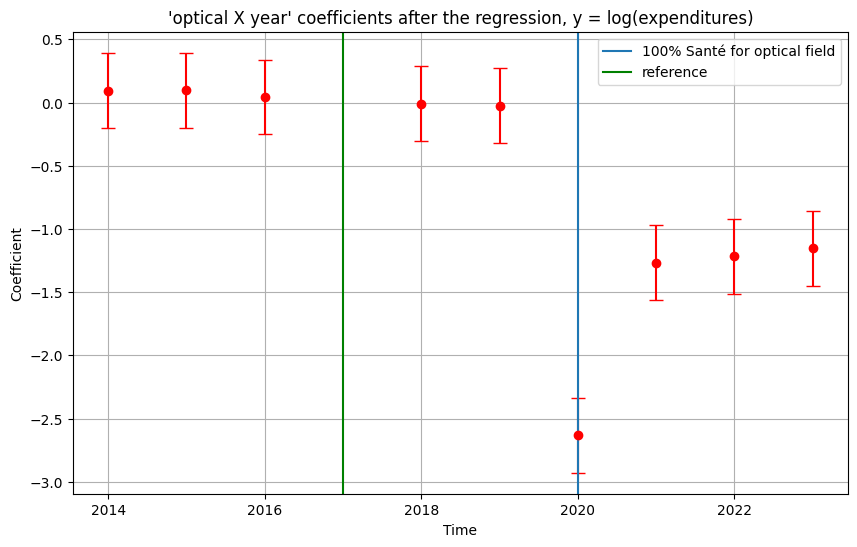

In [17]:
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'optical X year' coefficients after the regression, y = log(expenditures)")
plt.axvline(x=2020, label="100% Santé for optical field")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

#### Quantities | reference : 2020

In [18]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [19]:
for col in df.filter(like="20").columns:
    df[f"{col} x optical"] = df[f"{col}"] * df["OPTIQUE MEDICALE"]

In [20]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col or "audio" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["quantities"])

In [21]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical field", yname="log(quantities)"))

                     Linear regression for optical field                      
Dep. Variable:        log(quantities)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     680.6
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          3.71e-110
Time:                        17:47:59   Log-Likelihood:                 45.596
No. Observations:                 140   AIC:                            -27.19
Df Residuals:                     108   BIC:                             66.94
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

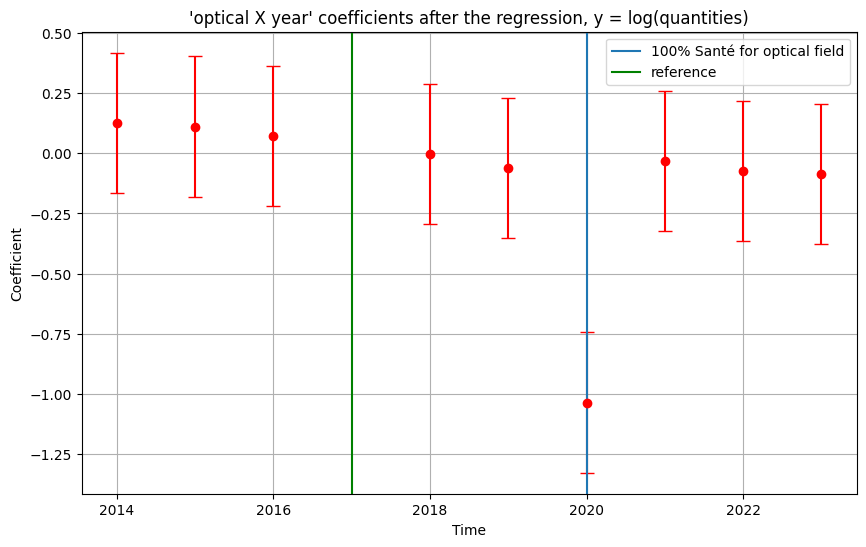

In [23]:
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'optical X year' coefficients after the regression, y = log(quantities)")
plt.axvline(x=2020, label="100% Santé for optical field")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

---

## HEARING FIELD

#### Expenditures (on the entire field) | reference : 2020

In [24]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [25]:
for col in df.filter(like="20").columns:
    df[f"{col} x hearing"] = df[f"{col}"] * df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]

In [26]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col or "optique" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["expenditures"])

In [27]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for hearing field", yname="log(expenditures)"))

                     Linear regression for hearing field                      
Dep. Variable:      log(expenditures)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     83.87
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.11e-62
Time:                        17:51:13   Log-Likelihood:                -13.825
No. Observations:                 140   AIC:                             91.65
Df Residuals:                     108   BIC:                             185.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

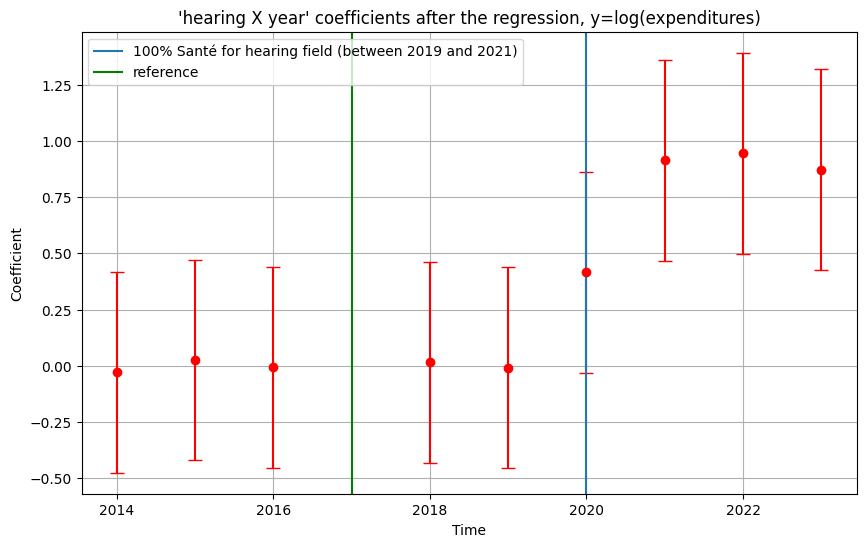

In [28]:
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'hearing X year' coefficients after the regression, y=log(expenditures)")
plt.axvline(x=2020, label="100% Santé for hearing field (between 2019 and 2021)")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

#### Quantities (on the entire field) | reference : 2020

In [29]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [30]:
for col in df.filter(like="20").columns:
    df[f"{col} x hearing"] = df[f"{col}"] * df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]

In [31]:
piles = {'2014': 5438,
  '2015': 4814,
  '2016': 5041,
  '2017': 5622,
  '2018': 5729,
  '2019': 4699397,
  '2020': 5532172,
  '2021': 4568235,
  '2022': 4126171,
  '2023': 3964723}
piles = list(piles.values())
piles

[5438, 4814, 5041, 5622, 5729, 4699397, 5532172, 4568235, 4126171, 3964723]

In [32]:
df.loc[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]==1, "quantities"] = df.loc[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]==1, "quantities"] - piles
df.loc[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]==1, "quantities"]

0    2050560
1    2290241
2    2401105
3    2553255
4    2663658
5    1385282
6     867989
7    1908149
8    2567795
9    3793826
Name: quantities, dtype: int64

In [33]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col or "optique" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["quantities"])

In [34]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for hearing field", yname="log(quantities)"))

                     Linear regression for hearing field                      
Dep. Variable:        log(quantities)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     875.0
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          5.13e-116
Time:                        17:53:44   Log-Likelihood:                 64.257
No. Observations:                 140   AIC:                            -64.51
Df Residuals:                     108   BIC:                             29.62
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

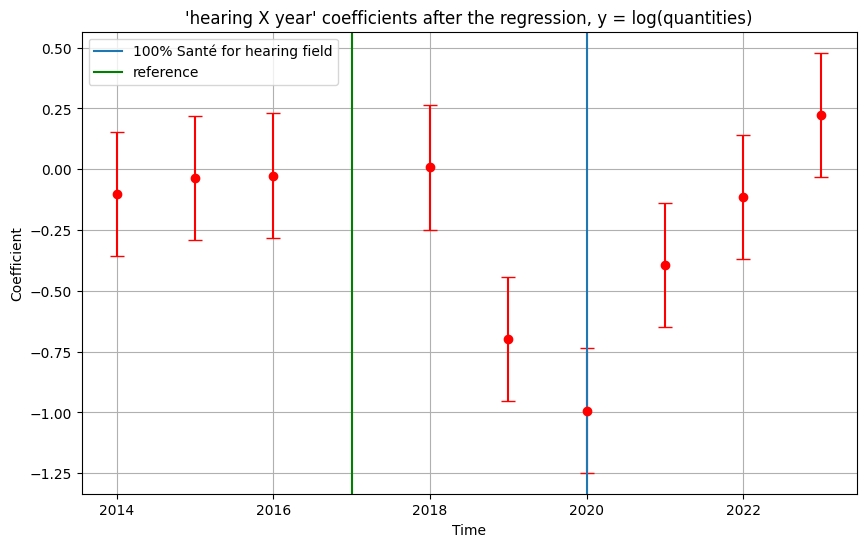

In [ ]:
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'hearing X year' coefficients after the regression, y = log(quantities)")
plt.axvline(x=2020, label="100% Santé for hearing field")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

the evolution of the number of refunds starting from 2019 is caused by the introduction of batteries' refunding after the demand's increasing. (1,50 euros per box in addition of a limited number per year), that's why the quantities are exploding whereas expenditures don't.

----------------------------------------------

## DENTAL FIELD

#### Expenditures (only on prothesis) | reference : 2020

In [36]:
importlib.reload(functions)
from functions import gov_exp_dental

In [37]:
df = pd.read_excel("dental_titles.xlsx", index_col=0, sheet_name=0)
df = df.fillna(0)
to_keep = list(df[df["Panier100%"]==1]["all"].unique())
dental_prothesis = gov_exp_dental(cent_santé=True, to_keep=to_keep)

In [38]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0, sheet_name=0)
df = df[df["2014"]==0]
df = df.drop(columns=["2014"])
df_dental = pd.DataFrame({
    "year" : [i+2015 for i in range(9)],
    "expenditures" : list(dental_prothesis[0].values()),
    "quantities" : list(dental_prothesis[1].values()),
    "DENTAL" : [1 for i in range(len(dental_prothesis[0].keys()))]
}
)

df_dental = pd.get_dummies(df_dental, columns=['year'], prefix='', prefix_sep='')

In [39]:
df = pd.concat([df, df_dental], axis=0)
df = df.fillna(0)
df = df.astype(int)

In [40]:
for col in df.filter(like="20").columns:
    df[f"{col} x dental"] = df[f"{col}"] * df["DENTAL"]

In [41]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col or "optique" in col.lower() or "audio" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["expenditures"])

In [42]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for dental field", yname="log(expenditures)"))

                      Linear regression for dental field                      
Dep. Variable:      log(expenditures)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     75.10
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.33e-57
Time:                        17:54:28   Log-Likelihood:                -28.882
No. Observations:                 135   AIC:                             117.8
Df Residuals:                     105   BIC:                             204.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

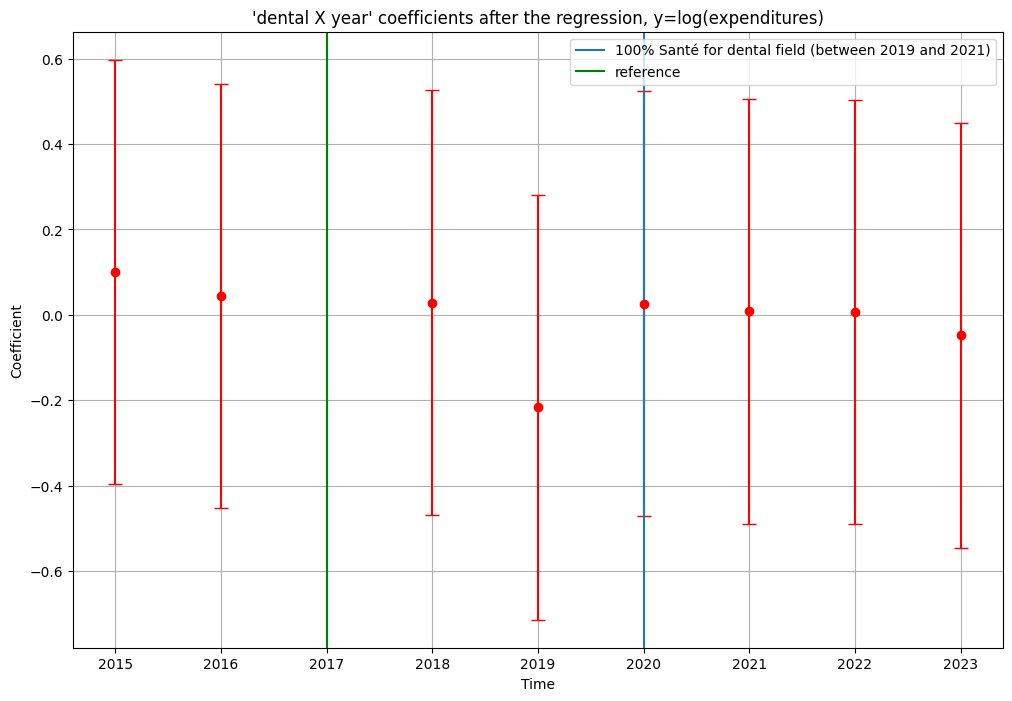

In [46]:
time_periods = [i+2015 for i in range(2)] + [i+2018 for i in range(6)]
coefficients = model.params[-8:]
std_errors = model.bse[-8:]

plt.figure(figsize=(12, 8))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'dental X year' coefficients after the regression, y=log(expenditures)")
plt.axvline(x=2020, label="100% Santé for dental field (between 2019 and 2021)")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

---

#### Quantities (only on prothesis) | reference : 2020

In [48]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col or "optique" in col.lower() or "audio" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["quantities"])

In [49]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for dental field", yname="log(quantities)"))

                      Linear regression for dental field                      
Dep. Variable:        log(quantities)   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.12e-64
Time:                        17:55:41   Log-Likelihood:                -82.919
No. Observations:                 135   AIC:                             225.8
Df Residuals:                     105   BIC:                             313.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

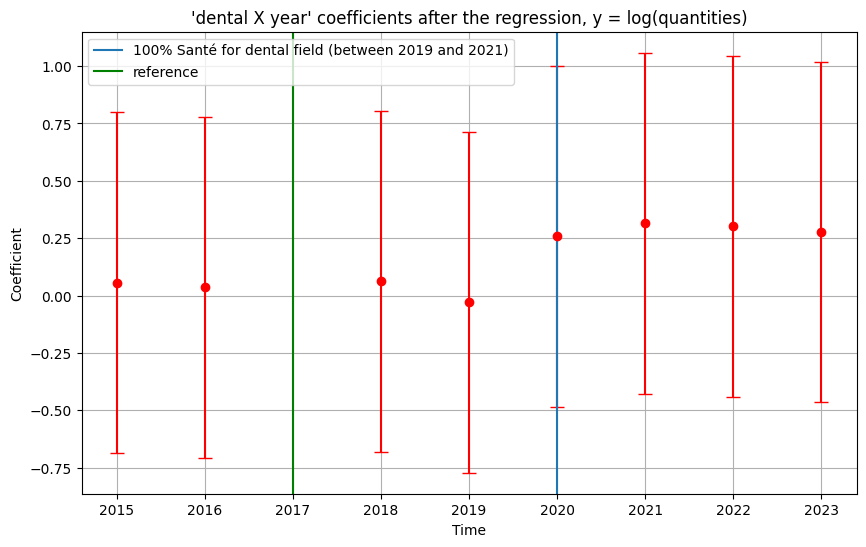

In [ ]:
time_periods = [i+2015 for i in range(2)] + [i+2018 for i in range(6)]
coefficients = model.params[-8:]
std_errors = model.bse[-8:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'dental X year' coefficients after the regression, y = log(quantities)")
plt.axvline(x=2020, label="100% Santé for dental field (between 2019 and 2021)")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

---

## HEARING + OPTICAL + DENTAL

#### Expenditures | reference : 2020

In [51]:
df = pd.read_excel("dental_titles.xlsx", index_col=0, sheet_name=0)
df = df.fillna(0)
to_keep = list(df[df["Panier100%"]==1]["all"].unique())
dental_prothesis = gov_exp_dental(cent_santé=True, to_keep=to_keep)

In [52]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0, sheet_name=0)
df = df[df["2014"]==0]
df = df.drop(columns=["2014"])
df_dental = pd.DataFrame({
    "year" : [i+2015 for i in range(9)],
    "expenditures" : list(dental_prothesis[0].values()),
    "quantities" : list(dental_prothesis[1].values()),
    "DENTAL" : [1 for i in range(len(dental_prothesis[0].keys()))]
}
)

df_dental = pd.get_dummies(df_dental, columns=['year'], prefix='', prefix_sep='')

In [53]:
df = pd.concat([df, df_dental], axis=0)
df = df.fillna(0)
df = df.astype(int)

In [54]:
for col in df.filter(like="20").columns:
    df[f"{col} x (dental+optical+hearing)"] = df[f"{col}"] * (df["DENTAL"] + df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df["OPTIQUE MEDICALE"])

In [55]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col]))
X = sm.add_constant(X)
y = np.log(df["expenditures"])

In [56]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for all fields", yname="log(expenditures)"))

                       Linear regression for all fields                       
Dep. Variable:      log(expenditures)   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     99.29
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.39e-63
Time:                        17:57:35   Log-Likelihood:                -7.9601
No. Observations:                 135   AIC:                             77.92
Df Residuals:                     104   BIC:                             168.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

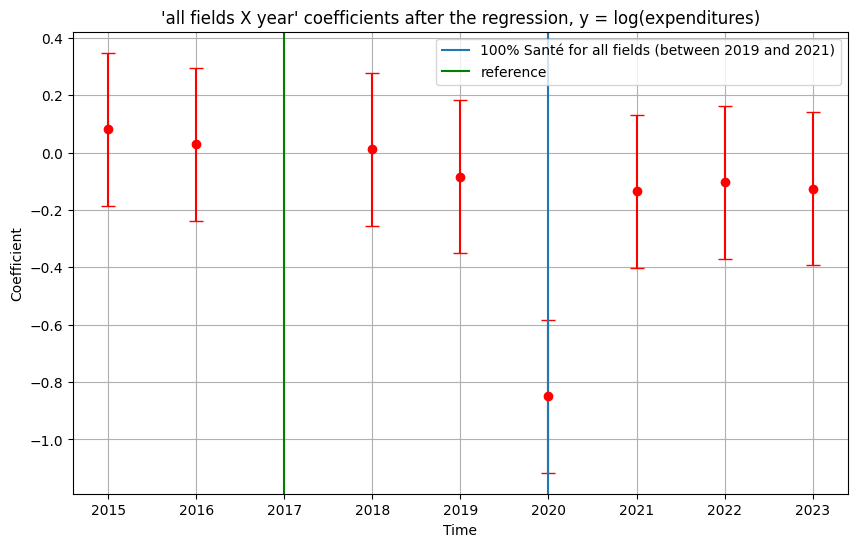

In [57]:
time_periods = [i+2015 for i in range(2)] + [i+2018 for i in range(6)]
coefficients = model.params[-8:]
std_errors = model.bse[-8:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'all fields X year' coefficients after the regression, y = log(expenditures)")
plt.axvline(x=2020, label="100% Santé for all fields (between 2019 and 2021)")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

#### Quantities | reference : 2020

In [58]:
piles = {'2015': 4814,
  '2016': 5041,
  '2017': 5622,
  '2018': 5729,
  '2019': 4699397,
  '2020': 5532172,
  '2021': 4568235,
  '2022': 4126171,
  '2023': 3964723}
piles = list(piles.values())
piles

[4814, 5041, 5622, 5729, 4699397, 5532172, 4568235, 4126171, 3964723]

In [59]:
df.loc[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]==1, "quantities"] = df.loc[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]==1, "quantities"] - piles
df.loc[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]==1, "quantities"]

1    2290241
2    2401105
3    2553255
4    2663658
5    1385282
6     867989
7    1908149
8    2567795
9    3793826
Name: quantities, dtype: int32

In [60]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2017" in col]))
X = sm.add_constant(X)
y = np.log(df["quantities"])

In [61]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for all fields", yname="log(quantities)"))

                       Linear regression for all fields                       
Dep. Variable:        log(quantities)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     846.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          4.18e-111
Time:                        17:58:11   Log-Likelihood:                 60.378
No. Observations:                 135   AIC:                            -58.76
Df Residuals:                     104   BIC:                             31.31
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

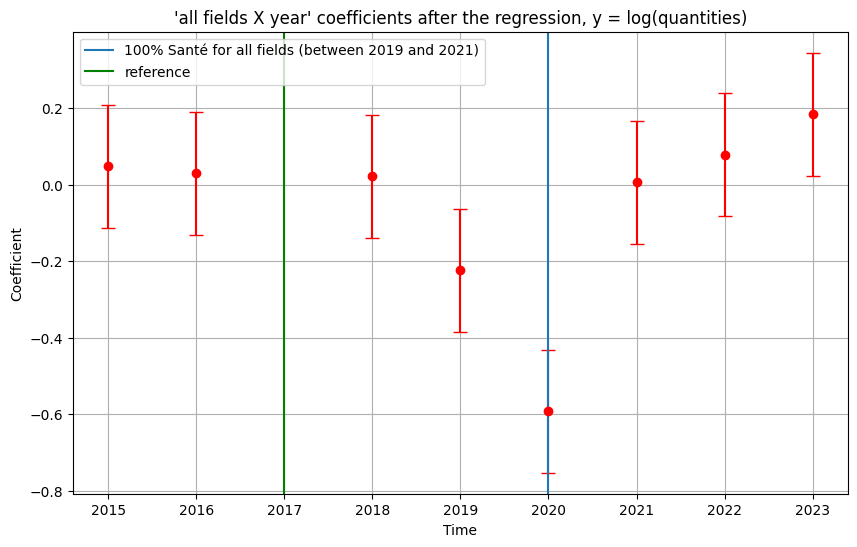

In [62]:
time_periods = [i+2015 for i in range(2)] + [i+2018 for i in range(6)]
coefficients = model.params[-8:]
std_errors = model.bse[-8:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'all fields X year' coefficients after the regression, y = log(quantities)")
plt.axvline(x=2020, label="100% Santé for all fields (between 2019 and 2021)")
plt.axvline(x=2017, label="reference", color="green")
plt.grid(True)
plt.legend()

plt.show()

---

## WITH AGE RANGE

In [63]:
df_aged = pd.read_excel("df_for_reg-with_age_range.xlsx", index_col=0)
df_aged = df_aged[df_aged["expenditures"]!=0]
df_aged = df_aged[df_aged["0-20"]==0]
df_aged = df_aged.drop(columns=["0-20", "60-80"])

In [64]:
for col in df_aged.filter(like="20").columns:
    df_aged[f'{col} x (hearing+optical) x 20-40'] = (df_aged[f"{col}"] * df_aged[f"20-40"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
    df_aged[f'{col} x (hearing+optical) x 40-60'] = (df_aged[f"{col}"] * df_aged[f"40-60"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])

In [65]:
interact_columns = df_aged.filter(like="interact.").columns
dash_columns = [col for col in df_aged.columns if "-" in col]

for interact_col in interact_columns:
    for dash_col in dash_columns:
        df_aged[f"{interact_col}_{dash_col}"] = df_aged[interact_col] * df_aged[dash_col]

---

## HEARING + OPTICAL

#### Expenditures | reference : 2020

In [75]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures", "quantities"] + [col for col in df_aged.columns if "2017" in col or "20-40 x" in col]))
X = sm.add_constant(X)
y = np.log(df_aged["expenditures"])

In [76]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for (optical+hearing) with age range", yname="log(expenditures)"))

            Linear regression for (optical+hearing) with age range            
Dep. Variable:      log(expenditures)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     73.69
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          6.81e-156
Time:                        18:04:23   Log-Likelihood:                -356.22
No. Observations:                 420   AIC:                             798.4
Df Residuals:                     377   BIC:                             972.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [77]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

interact_20_40 = params[params.index.str.contains("x 20-40")]
interact_40_60 = params[params.index.str.contains("x 40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("x 20-40")]
interact_40_60_std = std[std.index.str.contains("x 40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

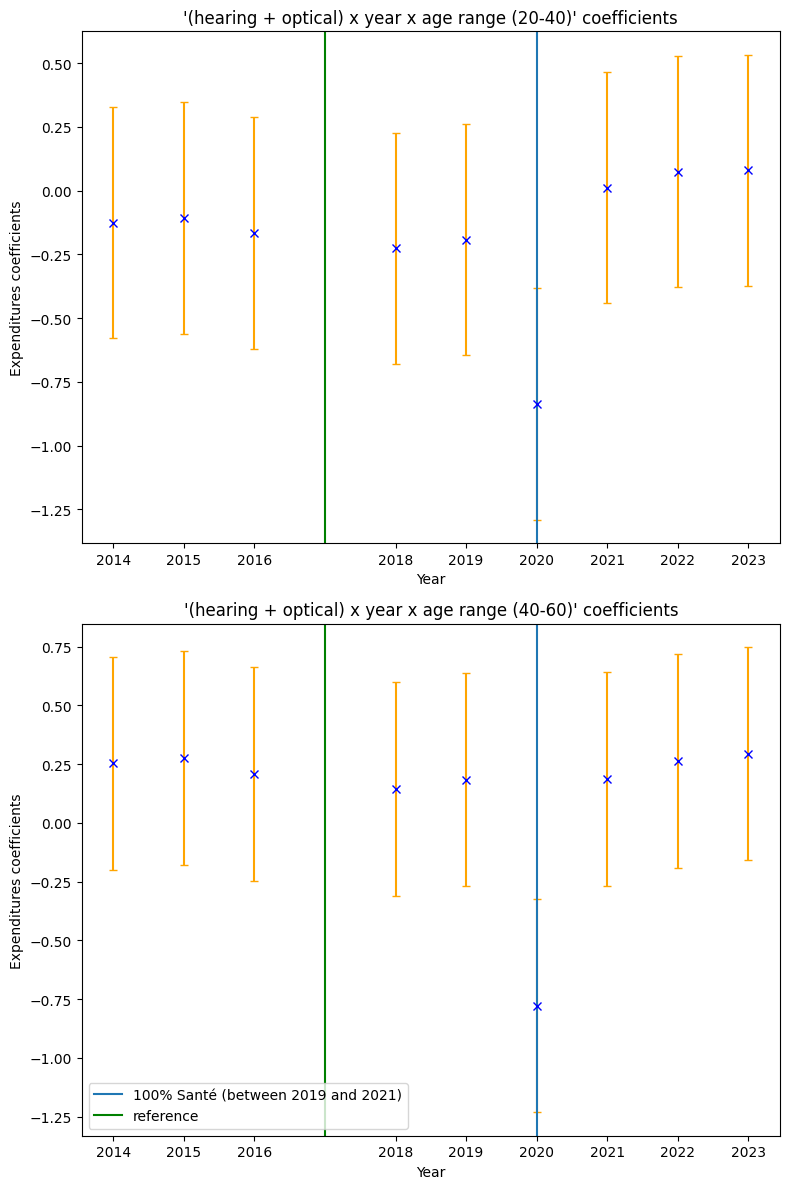

In [ ]:
width = 0.35
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "'(hearing + optical) x year x age range (20-40)' coefficients"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title(
    "'(hearing + optical) x year x age range (40-60)' coefficients"
    )

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures coefficients")
    axes[i].set_xticks(time_periods)
    axes[i].axvline(x=2020, label="100% Santé (between 2019 and 2021)")
    axes[i].axvline(x=2017, label="reference", color="green")


plt.legend()
plt.tight_layout()
plt.show()

---

#### Quantities | reference : 2020

In [79]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures", "quantities"] + [col for col in df_aged.columns if "2017" in col or "20-40 x" in col]))
X = sm.add_constant(X)
y = np.log(df_aged["quantities"])

In [80]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for (optical+hearing) with age range", yname="log(quantities)"))

            Linear regression for (optical+hearing) with age range            
Dep. Variable:        log(quantities)   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     182.2
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          6.26e-224
Time:                        18:05:35   Log-Likelihood:                -396.18
No. Observations:                 420   AIC:                             878.4
Df Residuals:                     377   BIC:                             1052.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [81]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

interact_20_40 = params[params.index.str.contains("x 20-40")]
interact_40_60 = params[params.index.str.contains("x 40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("x 20-40")]
interact_40_60_std = std[std.index.str.contains("x 40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

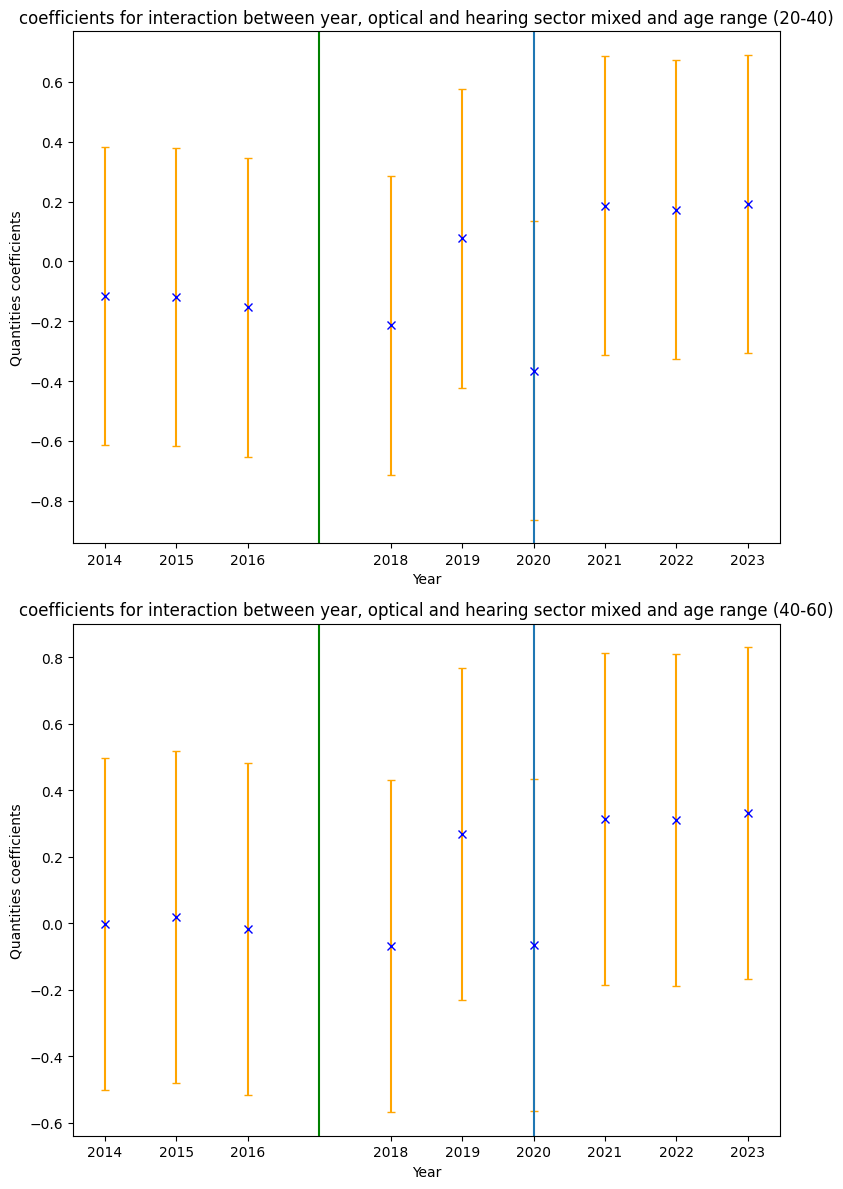

In [82]:
width = 0.35
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "coefficients for interaction between year, optical and hearing sector mixed and age range (20-40)"
)


axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (40-60)")

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Quantities coefficients")
    axes[i].set_xticks(time_periods)
    axes[i].axvline(x=2020, label="100% Santé (between 2019 and 2021)")
    axes[i].axvline(x=2017, label="reference", color="green")

plt.tight_layout()
plt.show()

---

## OPTICAL

#### Expenditures | reference : 2020

In [83]:
for col in df_aged.filter(like="20").columns:
    df_aged[f"{col} x optical x 20-40"] = df_aged[f"{col}"] * df_aged["OPTIQUE MEDICALE"] * df_aged["20-40"]
    df_aged[f"{col} x optical x 40-60"] = df_aged[f"{col}"] * df_aged["OPTIQUE MEDICALE"] * df_aged["40-60"]

In [84]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures", "quantities"] + [col for col in df_aged.columns if "2017" in col or "20-40 x" in col or "audio" in col.lower() or "(hearing+optical)" in col]))
X = sm.add_constant(X)
y = np.log(df_aged["expenditures"])

In [85]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical with age range", yname="log(expenditures)"))

                 Linear regression for optical with age range                 
Dep. Variable:      log(expenditures)   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     81.33
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          4.85e-163
Time:                        18:06:03   Log-Likelihood:                -337.66
No. Observations:                 420   AIC:                             761.3
Df Residuals:                     377   BIC:                             935.1
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [86]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

interact_20_40 = params[params.index.str.contains("x 20-40")]
interact_40_60 = params[params.index.str.contains("x 40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("x 20-40")]
interact_40_60_std = std[std.index.str.contains("x 40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

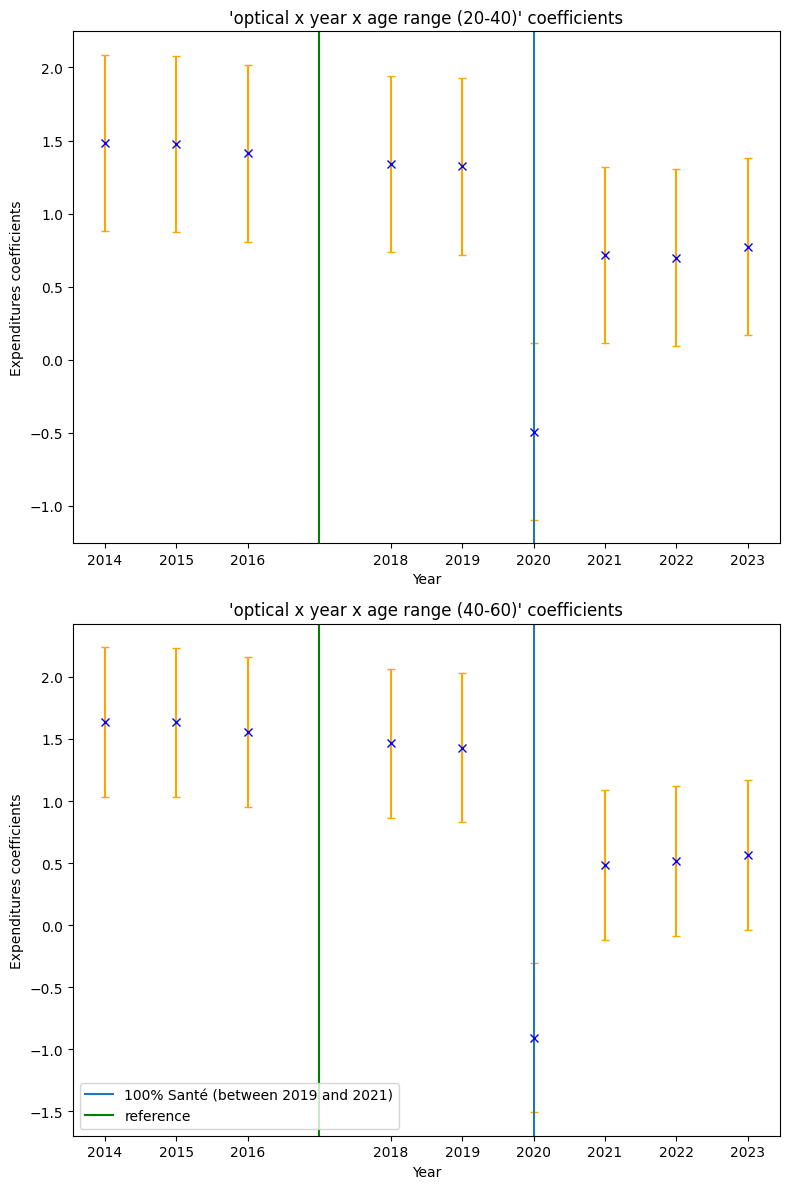

In [87]:
width = 0.35
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "'optical x year x age range (20-40)' coefficients"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title(
    "'optical x year x age range (40-60)' coefficients"
    )

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures coefficients")
    axes[i].set_xticks(time_periods)
    axes[i].axvline(x=2020, label="100% Santé (between 2019 and 2021)")
    axes[i].axvline(x=2017, label="reference", color="green")


plt.legend()
plt.tight_layout()
plt.show()

---

#### Quantities | reference : 2020

In [88]:
df_aged = pd.read_excel("df_for_reg-with_age_range.xlsx", index_col=0)
df_aged = df_aged[df_aged["expenditures"]!=0]
df_aged = df_aged[df_aged["0-20"]==0]
df_aged = df_aged.drop(columns=["0-20", "60-80"])
for col in df_aged.filter(like="20").columns:
    df_aged[f'{col} x (hearing+optical) x 20-40'] = (df_aged[f"{col}"] * df_aged[f"20-40"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
    df_aged[f'{col} x (hearing+optical) x 40-60'] = (df_aged[f"{col}"] * df_aged[f"40-60"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
interact_columns = df_aged.filter(like="interact.").columns
dash_columns = [col for col in df_aged.columns if "-" in col]

for interact_col in interact_columns:
    for dash_col in dash_columns:
        df_aged[f"{interact_col}_{dash_col}"] = df_aged[interact_col] * df_aged[dash_col]

In [89]:
for col in df_aged.filter(like="20").columns:
    df_aged[f"{col} x optical x 20-40"] = df_aged[f"{col}"] * df_aged["OPTIQUE MEDICALE"] * df_aged["20-40"]
    df_aged[f"{col} x optical x 40-60"] = df_aged[f"{col}"] * df_aged["OPTIQUE MEDICALE"] * df_aged["40-60"]

In [90]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures", "quantities"] + [col for col in df_aged.columns if "2017" in col or "20-40 x" in col or "audio" in col.lower() or "(hearing+optical)" in col]))
X = sm.add_constant(X)
y = np.log(df_aged["quantities"])

In [91]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical with age range", yname="log(quantities)"))

                 Linear regression for optical with age range                 
Dep. Variable:        log(quantities)   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     199.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          4.03e-231
Time:                        18:07:05   Log-Likelihood:                -377.65
No. Observations:                 420   AIC:                             841.3
Df Residuals:                     377   BIC:                             1015.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [92]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

interact_20_40 = params[params.index.str.contains("x 20-40")]
interact_40_60 = params[params.index.str.contains("x 40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("x 20-40")]
interact_40_60_std = std[std.index.str.contains("x 40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

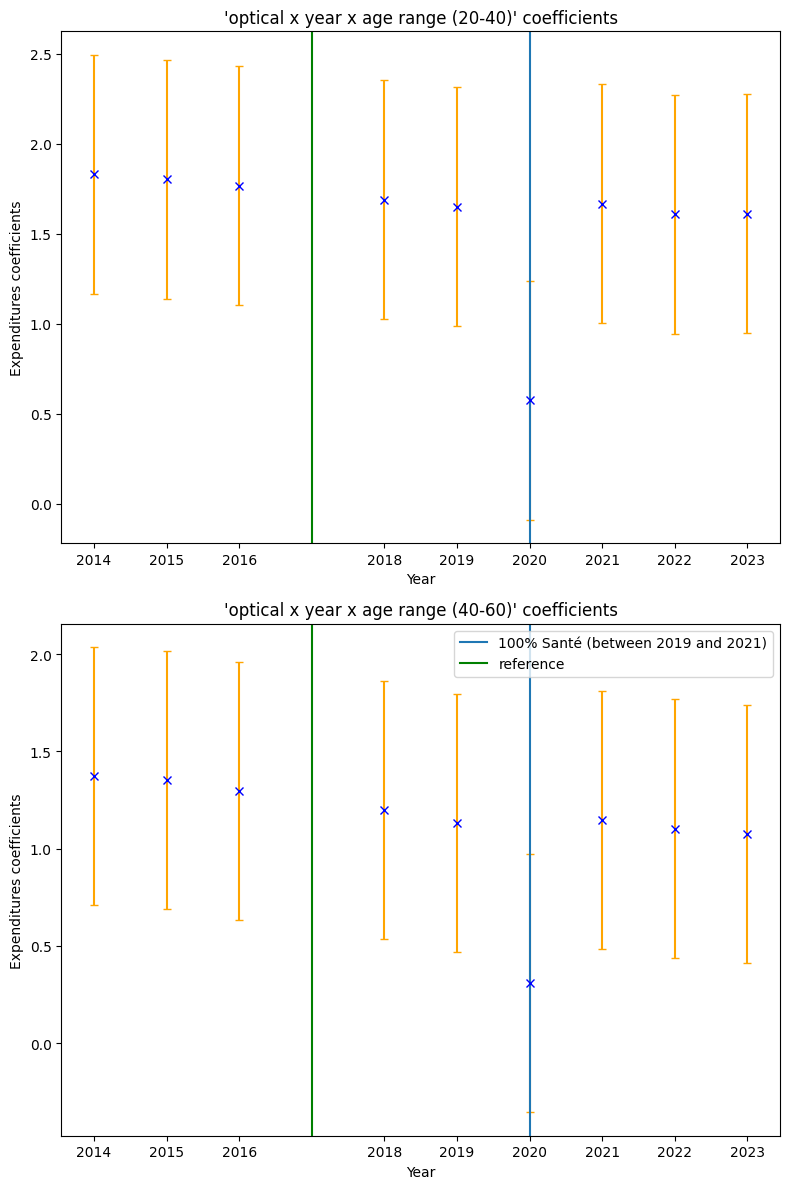

In [93]:
width = 0.35
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "'optical x year x age range (20-40)' coefficients"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title(
    "'optical x year x age range (40-60)' coefficients"
    )

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures coefficients")
    axes[i].set_xticks(time_periods)
    axes[i].axvline(x=2020, label="100% Santé (between 2019 and 2021)")
    axes[i].axvline(x=2017, label="reference", color="green")


plt.legend()
plt.tight_layout()
plt.show()

## HEARING

#### Expenditures | reference : 2020

In [94]:
df_aged = pd.read_excel("df_for_reg-with_age_range.xlsx", index_col=0)
df_aged = df_aged[df_aged["expenditures"]!=0]
df_aged = df_aged[df_aged["0-20"]==0]
df_aged = df_aged.drop(columns=["0-20", "60-80"])
for col in df_aged.filter(like="20").columns:
    df_aged[f'{col} x (hearing+optical) x 20-40'] = (df_aged[f"{col}"] * df_aged[f"20-40"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
    df_aged[f'{col} x (hearing+optical) x 40-60'] = (df_aged[f"{col}"] * df_aged[f"40-60"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
interact_columns = df_aged.filter(like="interact.").columns
dash_columns = [col for col in df_aged.columns if "-" in col]

for interact_col in interact_columns:
    for dash_col in dash_columns:
        df_aged[f"{interact_col}_{dash_col}"] = df_aged[interact_col] * df_aged[dash_col]

In [95]:
for col in df_aged.filter(like="20").columns:
    df_aged[f"{col} x hearing x 20-40"] = df_aged[f"{col}"] * df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] * df_aged["20-40"]
    df_aged[f"{col} x hearing x 40-60"] = df_aged[f"{col}"] * df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] * df_aged["40-60"]

In [96]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures", "quantities"] + [col for col in df_aged.columns if "2017" in col or "20-40 x" in col or "optique" in col.lower() or "(hearing+optical)" in col]))
X = sm.add_constant(X)
y = np.log(df_aged["expenditures"])

In [97]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for hearing with age range", yname="log(expenditures)"))

                 Linear regression for hearing with age range                 
Dep. Variable:      log(expenditures)   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     79.61
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.77e-161
Time:                        18:08:04   Log-Likelihood:                -341.71
No. Observations:                 420   AIC:                             769.4
Df Residuals:                     377   BIC:                             943.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [98]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

interact_20_40 = params[params.index.str.contains("x 20-40")]
interact_40_60 = params[params.index.str.contains("x 40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("x 20-40")]
interact_40_60_std = std[std.index.str.contains("x 40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

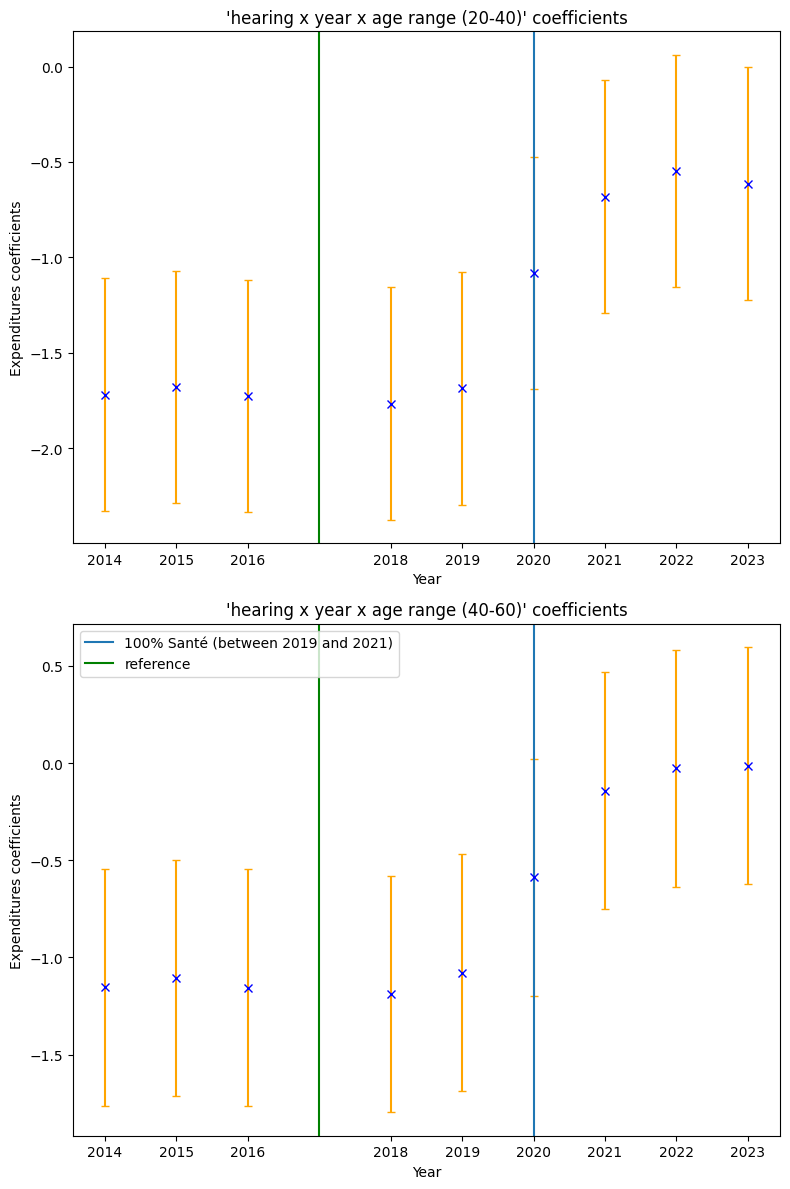

In [99]:
width = 0.35
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "'hearing x year x age range (20-40)' coefficients"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title(
    "'hearing x year x age range (40-60)' coefficients"
    )

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures coefficients")
    axes[i].set_xticks(time_periods)
    axes[i].axvline(x=2020, label="100% Santé (between 2019 and 2021)")
    axes[i].axvline(x=2017, label="reference", color="green")


plt.legend()
plt.tight_layout()
plt.show()

#### Quantities | reference : 2020

In [100]:
df_aged = pd.read_excel("df_for_reg-with_age_range.xlsx", index_col=0)
df_aged = df_aged[df_aged["expenditures"]!=0]
df_aged = df_aged[df_aged["0-20"]==0]
df_aged = df_aged.drop(columns=["0-20", "60-80"])
for col in df_aged.filter(like="20").columns:
    df_aged[f'{col} x (hearing+optical) x 20-40'] = (df_aged[f"{col}"] * df_aged[f"20-40"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
    df_aged[f'{col} x (hearing+optical) x 40-60'] = (df_aged[f"{col}"] * df_aged[f"40-60"]) * (df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df_aged["OPTIQUE MEDICALE"])
interact_columns = df_aged.filter(like="interact.").columns
dash_columns = [col for col in df_aged.columns if "-" in col]

for interact_col in interact_columns:
    for dash_col in dash_columns:
        df_aged[f"{interact_col}_{dash_col}"] = df_aged[interact_col] * df_aged[dash_col]

In [101]:
for col in df_aged.filter(like="20").columns:
    df_aged[f"{col} x hearing x 20-40"] = df_aged[f"{col}"] * df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] * df_aged["20-40"]
    df_aged[f"{col} x hearing x 40-60"] = df_aged[f"{col}"] * df_aged["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] * df_aged["40-60"]

In [102]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures", "quantities"] + [col for col in df_aged.columns if "2017" in col or "20-40 x" in col or "optique" in col.lower() or "(hearing+optical)" in col]))
X = sm.add_constant(X)
y = np.log(df_aged["quantities"])

In [103]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for hearing with age range", yname="log(quantities)"))

                 Linear regression for hearing with age range                 
Dep. Variable:        log(quantities)   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     201.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.26e-231
Time:                        18:09:03   Log-Likelihood:                -376.34
No. Observations:                 420   AIC:                             838.7
Df Residuals:                     377   BIC:                             1012.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [104]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

interact_20_40 = params[params.index.str.contains("x 20-40")]
interact_40_60 = params[params.index.str.contains("x 40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("x 20-40")]
interact_40_60_std = std[std.index.str.contains("x 40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

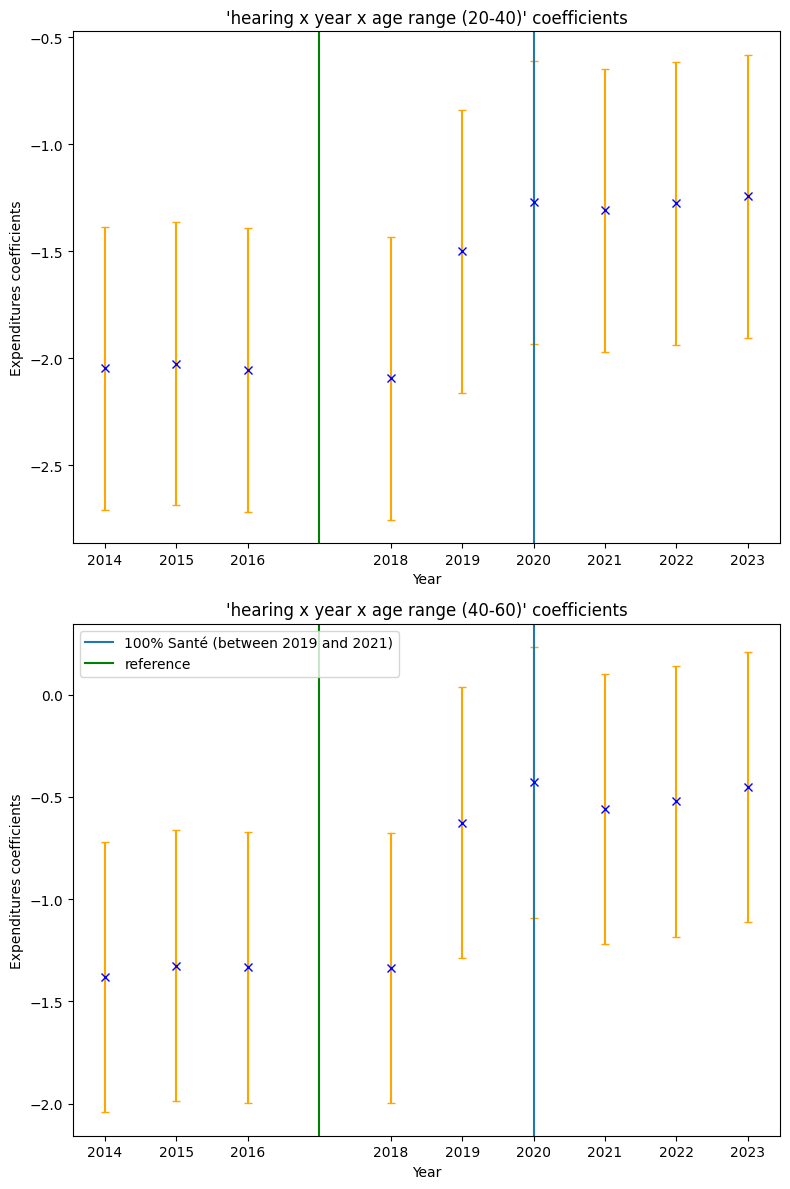

In [105]:
width = 0.35
time_periods = [i+2014 for i in range(3)] + [i+2018 for i in range(6)]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "'hearing x year x age range (20-40)' coefficients"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title(
    "'hearing x year x age range (40-60)' coefficients"
    )

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures coefficients")
    axes[i].set_xticks(time_periods)
    axes[i].axvline(x=2020, label="100% Santé (between 2019 and 2021)")
    axes[i].axvline(x=2017, label="reference", color="green")


plt.legend()
plt.tight_layout()
plt.show()

----------------------------